## Visual analysis of the presidential speech in France with python


### Introduction
<!-- wp:paragraph -->
<p>This project will be my first experimentation with Web scraping tools, where using Python language I intend to make a visual analysis of the most common words between the inauguration speeches of <strong>Presidents François Hollande (2012) and Emmanuel Macron (2022)</strong>, these speeches were obtained from the official website <a rel="noreferrer noopener" href="https://www.vie-publique.fr/" target="_blank">https://www.vie-publique.fr/ </a>.</p>
<!-- /wp:paragraph -->

<!-- wp:paragraph -->
<p>We will use <strong>Python's BeatifulSoup</strong> dependency to extract the information of each speech in its specific url, and then we will use the <strong>Word_cloud</strong> package to convert it into a cloud of the most used words achieving our first data visualization.</p>
<!-- /wp:paragraph -->

<!-- wp:paragraph -->
<p>Then, by means of the <strong>Matplotlib</strong> dependency, we will obtain a visualization of the top 10 most common words, achieving a visual comparison of each speech according to its text.</p>
<!-- /wp:paragraph -->

<!-- wp:paragraph -->
<p>At the end, we will make a primary analysis of the results and the usefulness of the <strong>Web scraping</strong> tool and <strong>Python</strong> as a language for data processing and visualization towards knowledge.</p>
<!-- /wp:paragraph -->

### DATA
<!-- wp:paragraph -->
<p>All the information used is published on the <a rel="noreferrer noopener" href="https://www.vie-publique.fr/discours-dans-lactualite/270061-les-discours-dinvestiture-des-presidents-de-la-republique" target="_blank">official portal of Public Life of the French government</a>, its link is available to all and this use will be for academic purposes only.</p>
<!-- /wp:paragraph -->

<!-- wp:paragraph -->
<p>For chronology, I chose <a rel="noreferrer noopener" href="https://www.vie-publique.fr/discours/285059-emmanuel-macron-07052022-investiture-president-de-la-republique" target="_blank">President Macron's last investiture speech made on May 7, 2022</a> and <a href="https://www.vie-publique.fr/discours/185063-declaration-de-m-francois-hollande-president-de-la-republique-sur-son" data-type="URL" data-id="https://www.vie-publique.fr/discours/185063-declaration-de-m-francois-hollande-president-de-la-republique-sur-son">President Hollande's investiture speech of May 15, 2012</a>. (President Macron's interim re-election speech of May 14, 2017 was omitted)</p>
<!-- /wp:paragraph -->

<!-- wp:paragraph -->
<p>Technically the project is implemented in Python on a <strong>JupyterLab</strong> notebook locally and all its files will be hosted on GitHub for consultation and updating.</p>
<!-- /wp:paragraph -->

## METHODOLOGY

## Import of dependencies




We import all the dependencies to be used in our notebook.

In [100]:
#Import requests for web scraping
import pandas as pd
import requests as rq
import numpy as np
import collections

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import matplotlib as mpl
import matplotlib.pyplot as plt

# import k-means from clustering stage
from PIL import Image 
from matplotlib import rcParams

print('Libraries installed')

Libraries installed


If you want to experiment with other dependencies or install more packages according to your project goals you can do it directly on the notebook, example:

In [101]:
!pip install lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


I always try to work with notebooks in JupyterLab locally under an Anaconda virtual environment (Conda env), I also use Google's COLAB and Deepnote which work very well as virtual machines if the project is suitable (it will always depend on the machine consumption in the data processing and the quality of the internet connection).

## Data collection and cleaning process
<!-- wp:paragraph -->
<p>We import <strong>BeautifulSoup</strong> to extract the entire html document for each speech and then convert it into text type (STR).</p>
<!-- /wp:paragraph -->

<!-- wp:paragraph -->
<p>We first used <a href="https://www.vie-publique.fr/discours/185063-declaration-de-m-francois-hollande-president-de-la-republique-sur-son" data-type="URL" data-id="https://www.vie-publique.fr/discours/185063-declaration-de-m-francois-hollande-president-de-la-republique-sur-son">President Hollande's inaugural speech of May 15, 2012.</a></p>
<!-- /wp:paragraph -->


In [102]:
#Import BeautifulSoup for html structure information from our request
from bs4 import BeautifulSoup

In [103]:
page = rq.get('https://www.vie-publique.fr/discours/185063-declaration-de-m-francois-hollande-president-de-la-republique-sur-son')

In [104]:
soup = BeautifulSoup(page.text, 'lxml')

In [105]:
data = [element.text for element in soup.find_all('span', {'class': 'text-formatted'})] #Retrieving text
data = str(data) #Convert to string
data

'["Monsieur le Président,Mesdames, MessieursEn ce jour où je suis investi de la plus haute charge de l\'État, j\'adresse aux Français un message de confiance.Nous sommes un grand pays qui, dans son histoire, a toujours su affronter les épreuves et relever les défis qui se présentaient à lui. A chaque fois, il y est parvenu, en restant lui-même. Toujours dans l\'élévation et l\'ouverture. Jamais, dans l\'abaissement et le repli.Tel est le mandat que j\'ai reçu du peuple français le 6 mai : redresser la France dans la justice. Ouvrir une voie nouvelle en Europe. Contribuer à la paix du monde comme à la préservation de la planète.Je mesure le poids des contraintes auxquelles nous faisons face : une dette massive, une croissance faible, un chômage élevé, une compétitivité dégradée et une Europe qui peine à sortir de la crise.Mais je l\'affirme ici : il n\'y a pas de fatalité, dés lors qu\'une volonté commune nous anime, qu\'une direction claire est fixée et que nous mobilisons pleinement n

<!-- wp:paragraph -->
<p>You have 3 options as parser de <strong>Beatifulsoup</strong>, in the end I chose <strong>lxml</strong>.<br>In the <a rel="noreferrer noopener" href="https://www.crummy.com/software/BeautifulSoup/bs4/doc/#differences-between-parsers" target="_blank">library documentation</a> you will find the differences:</p>
<!-- /wp:paragraph -->

<!-- wp:list -->
<ul><li><code><kbd>html.parser- built-in - no additional dependencies needed.</kbd></code></li><li><code><kbd>html5lib</kbd></code>-&nbsp;<em>the most forgiving - best used if the HTML is broken.</em></li><li><code><kbd>lxml</kbd></code>-&nbsp;<em>the fastest</em>.</li></ul>
<!-- /wp:list -->

<!-- wp:paragraph -->
<p>When we get the information as text, we install the Word_clouds package for Python, with this we can visualize our first "word cloud".</p>
<!-- /wp:paragraph -->

In [106]:
!pip -q install wordcloud #Library for wordcloud

You should know that there is a package called StopWords or empty words which according to Wikipedia is the name given to meaningless words such as articles, pronouns, prepositions, etc. that are filtered out before or after natural language data processing.
For this we install it in our notebook like this:

In [107]:
!pip -q install stop-words

This prevents these words from competing with our analysis.

<!-- wp:paragraph {"fontSize":"medium"} -->
### Word cloud
<!-- /wp:paragraph -->

<!-- wp:paragraph -->
<p><strong>Word Cloud is a technique with which we visualize text data in which the size of each word indicates its frequency or importance.</strong></p>
<!-- /wp:paragraph -->

In [108]:
from stop_words import get_stop_words #The words we want to ignore

stop_words_fr = get_stop_words('fr') #Spanish StopWords

In [109]:
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [114]:
stop_words = ["c'est", "qu'une", "tel", "plus", "cell", "qu'il", "C'est", "La", ":", "Je", "Il"] + stop_words_fr #Adding aditional StopWords
#initiate world cloud object
hollande_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stop_words
)

# generate the word cloud
hollande_wc.generate(data)

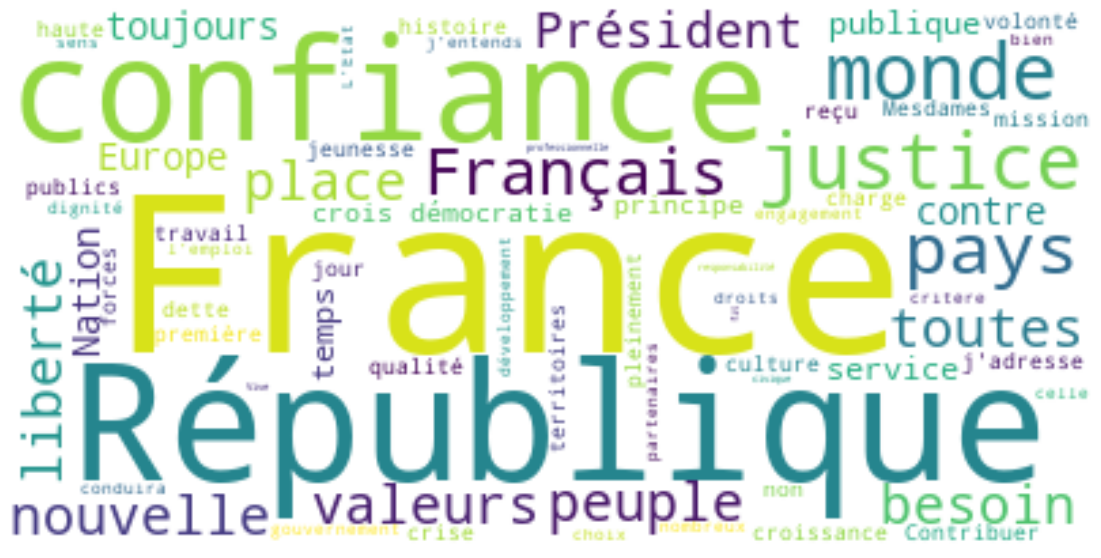

In [115]:
# display the word cloud
plt.imshow(hollande_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

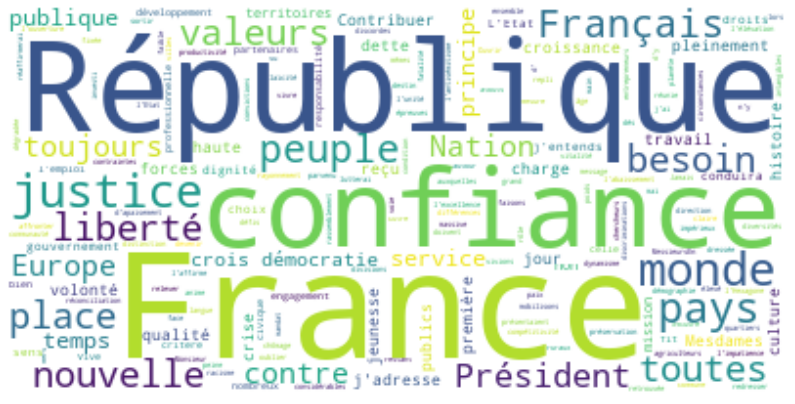

In [117]:
# re-generate the word cloud
hollande_wc.generate(data)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(hollande_wc, interpolation='bilinear')
plt.axis('off')
plt.show()


As a proposal we are going to use the silhouette of each president as the container of our <strong>Word Cloud</strong>, with this we associate the data to its origin in a visual way.

In [119]:
!wget --quiet https://javierladino.com/es/wp-content/uploads/2022/05/hollande.png #OutMaskImage

# save mask to hollande_mask
hollande_mask = np.array(Image.open('hollande.png'))
    
print('Image downloaded and saved!')

Image downloaded and saved!


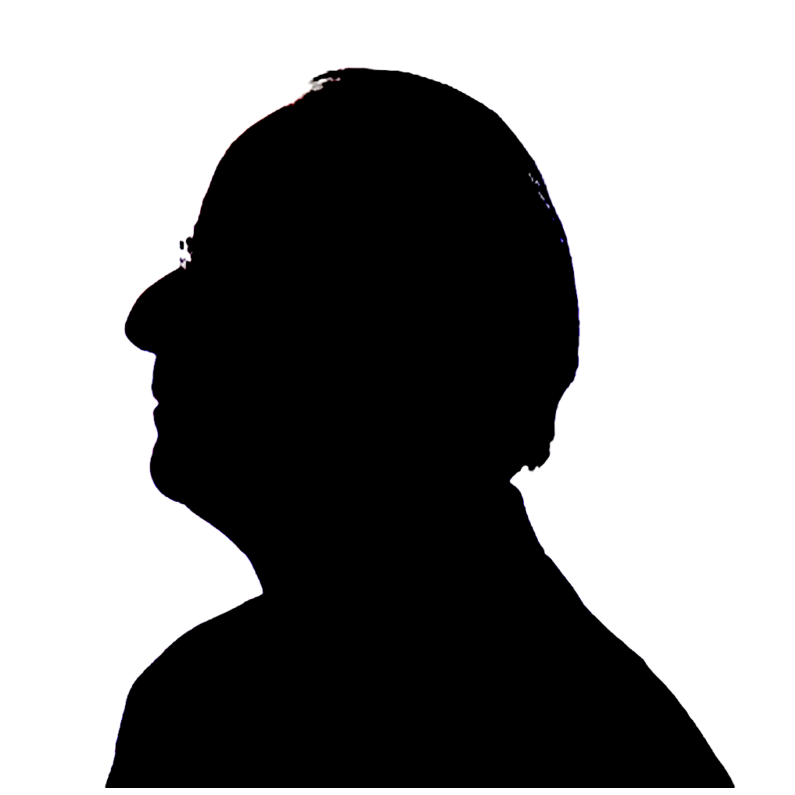

In [120]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(hollande_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

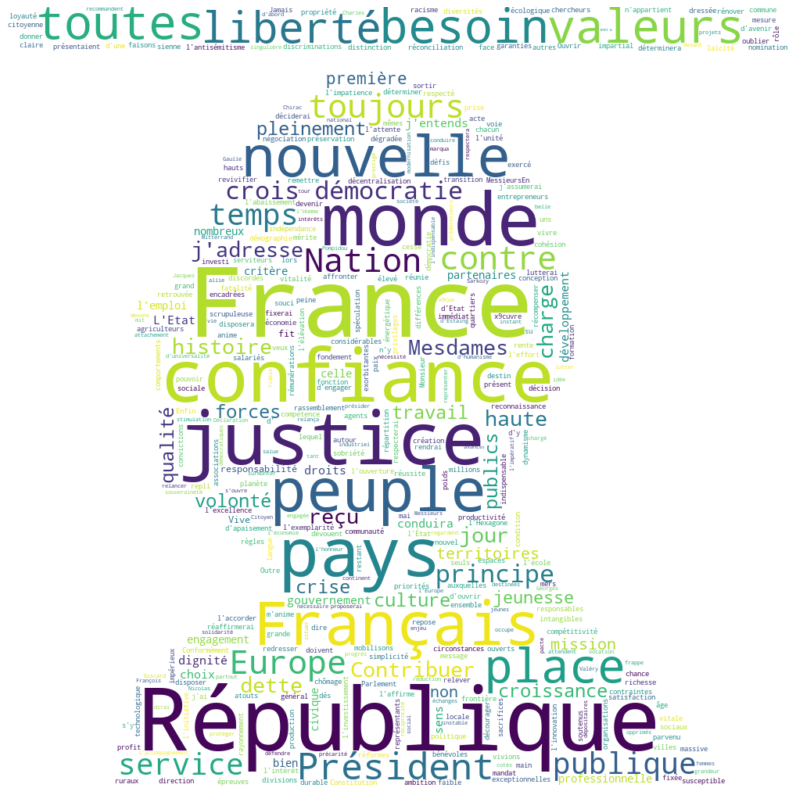

In [121]:
# instantiate a word cloud object
hollande_wc = WordCloud(background_color='white', max_words=2000, mask=hollande_mask, stopwords=stop_words)

# generate the word cloud
hollande_wc.generate(data)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height


plt.imshow(hollande_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

We are now going to plot with Matplotlib in Python the top 10 most repeated words of President Hollande's speech.



In [123]:
filtered_words = [word for word in data.split() if word not in stop_words]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

<BarContainer object of 10 artists>

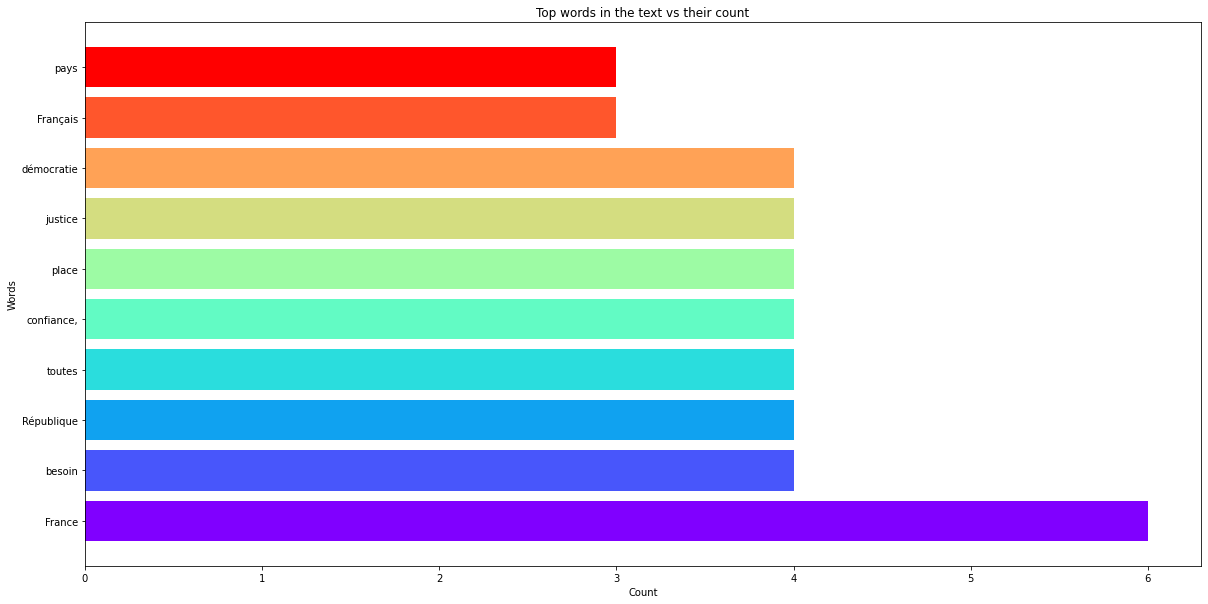

In [124]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the text vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

Now it is the turn to visualize President Macron's investiture speech made on May 7, 2022 with the same procedure as above.

In [125]:
website_url2= rq.get('https://www.vie-publique.fr/discours/285059-emmanuel-macron-07052022-investiture-president-de-la-republique').text #Bring the data from the target URL

In [128]:
soup2 = BeautifulSoup(website_url2,'lxml')

data2 = [element.text for element in soup2.find_all("p")] #Retrieving text
data2 = str(data2) #Convert to string
data2

'[\'\\nIntervenant(s) : \\n\', "\\nCirconstance : \\nCérémonie d\'investiture du président de la République le 7 mai 2022\\n", \'Mots-clés : \', \'Prononcé le \\n            7 mai 2022\\n\\n\', \'Mesdames et Messieurs,\', "\\nA l\'heure où les Français me confient à nouveau la plus haute charge, la conscience de la gravité des temps m\'accompagne. Du retour de la guerre en Europe à la pandémie, en passant par l\'urgence écologique et tant de crises que vous venez, Monsieur le président, à l\'instant d\'évoquer, rarement, notre monde et notre pays n\'avaient été confrontés à une telle conjonction de défis.", "Là où de nombreux peuples ont décidé le repli, cédé parfois à la tentation nationaliste, à la nostalgie du passé, aux sirènes d\'idéologies dont nous pensions avoir quitté les rives au siècle précédent, le peuple français a fait le choix d\'un projet clair et explicite d\'avenir. Un projet républicain et européen, un projet d\'indépendance dans un monde déstabilisé, un projet de pr

In [130]:
stop_words2 = ["c'est", "qu'une", "tel", "plus", "cell", "qu'il", "C'est", "La", ":", "Je", "Il", "dont", "'Agir"] + stop_words_fr #Adding aditional StopWords
#initiate world cloud object
macron_wc2 = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stop_words2
)

# generate the word cloud
macron_wc2.generate(data2)

Mask image President Macron

In [132]:
!wget --quiet http://javierladino.com/es/wp-content/uploads/2022/05/macron.png #OutMaskImage

# save mask to hollande_mask
macron_mask = np.array(Image.open('macron.png'))
    
print('Image downloaded and saved!')

Image downloaded and saved!


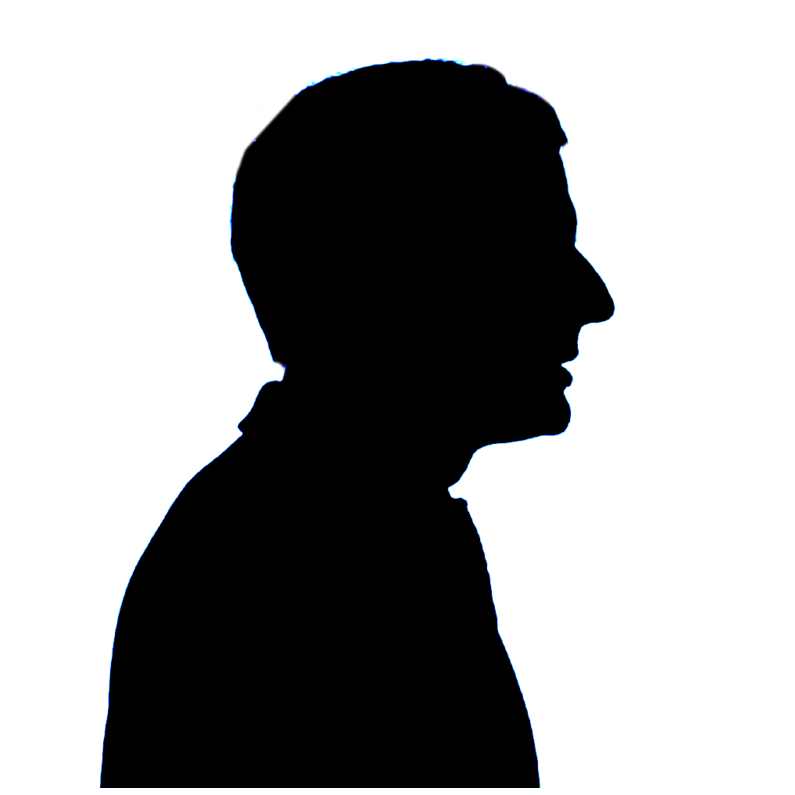

In [133]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(macron_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

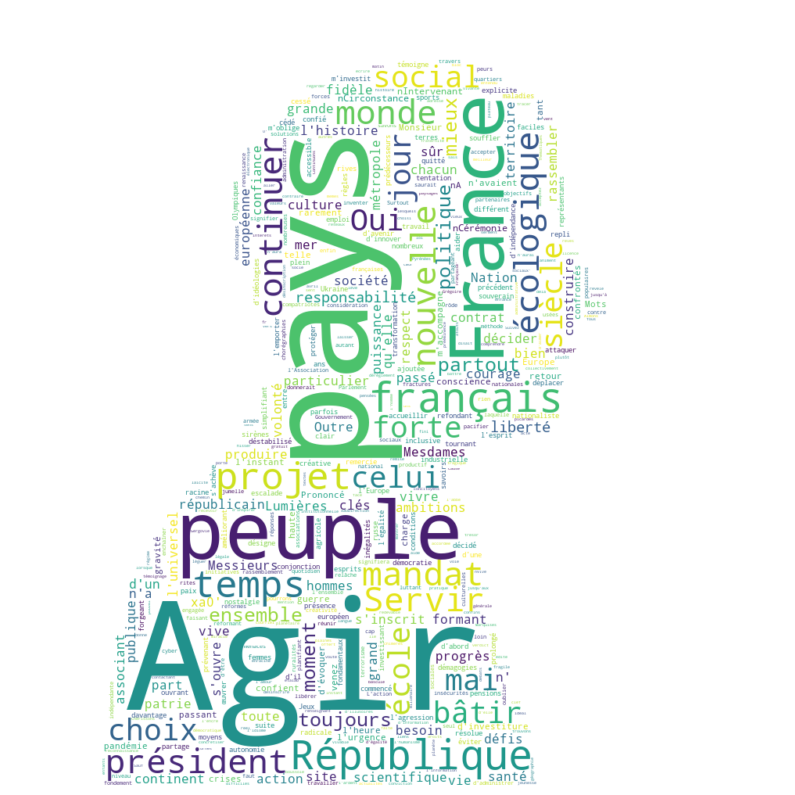

In [134]:
# instantiate a word cloud object
macron_wc2 = WordCloud(background_color='white', max_words=2000, mask=macron_mask, stopwords=stop_words2)

# generate the word cloud
macron_wc2.generate(data2)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height


plt.imshow(macron_wc2, interpolation='bilinear')
plt.axis('off')
plt.show()

In [135]:
filtered_words2 = [word for word in data2.split() if word not in stop_words2]
counted_words2 = collections.Counter(filtered_words2)

words = []
counts = []
for letter, count in counted_words2.most_common(10):
    words.append(letter)
    counts.append(count)

<BarContainer object of 10 artists>

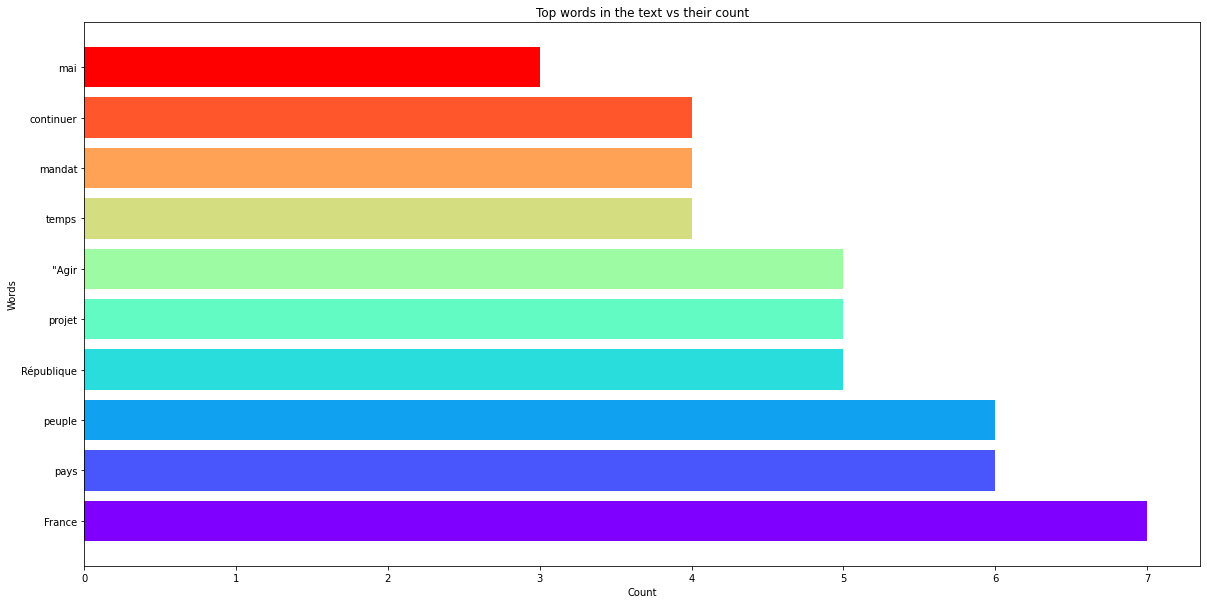

In [136]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the text vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

## Analysis of results
Inauguration speech of President François Hollande on May 15, 2012.

**Top 10 words:** France, need, Republic, all, trust, place, justice, democracy, French, country.

President Macron's investiture speech delivered on May 7, 2022.

**Top 10 words:** France, country, people, Republic, project, Act, time, mandate, continue, May.

## Conclusion
<!-- wp:paragraph -->
<p>We can generate several hypotheses when performing this data visualization exercise, especially if we start from the fact that in 10 years of difference many events have occurred that have changed the <strong>presidential discourse</strong>, added to the explosion of information (and misinformation) generated in social networks and internet, to the security problems with terrorist attacks, to the problems and actions against climate change, to the social and economic crisis due to the forced displacement of immigrants around the world, to the Covid-19 pandemic and the fragility of the medical system, and then to close with a war between Ukraine and Russia with a nuclear threat that destabilizes all sectors of society.</p>
<!-- /wp:paragraph -->

<!-- wp:paragraph -->
<p>2012 was an intense year in France, due to an election campaign tainted by terrorism and the return to power of the Socialists with many challenges and low popularity for François Hollande, while 2022 (still in progress) comes burdened with the results of all kinds left by the Covid-19 pandemic, added to the position of France (and the European Union) in the face of the armed conflict in Ukraine and Russia, where, after the re-election of Emmanuel Macron, a great responsibility falls on the country in the midst of the energy, social and social uncertainty that plagues the world.</p>
<!-- /wp:paragraph -->

<!-- wp:paragraph -->
<p>We can notice that the common words between the two speeches are: <strong><mark style="background-color:rgba(0, 0, 0, 0)" class="has-inline-color has-luminous-vivid-orange-color">France, Republic and Country</mark></strong>, which are set as the basis of a presidential text that involves the whole Nation, its sense of belonging, pride and freedom, a feeling that above all is part of the French people throughout its territory.</p>
<!-- /wp:paragraph -->

<!-- wp:paragraph -->
<p>For the 2012 speech, it is worth noting the equivalence of seven words in second place of use (Necessity, republic, all, trust, place, justice and democracy), <strong><mark style="background-color:rgba(0, 0, 0, 0)" class="has-inline-color has-luminous-vivid-orange-color">trust being</mark></strong>, in my opinion, the word that frames the axis of his message, first because after 17 years, socialism returns to power and then because it marks a difference between him and his predecessor, Nicolas Sarkozy, relying on the exercise of power with dignity and simplicity.</p>
<!-- /wp:paragraph -->

<!-- wp:paragraph -->
<p>Now for 2022, Emmanuel Macron after defeating the far-right Marine Le Pen in the second round, used in his speech a language that involved projection, diplomacy and inclusion, where in my point of view are the words: <strong><mark style="background-color:rgba(0, 0, 0, 0)" class="has-inline-color has-luminous-vivid-orange-color">Project and Act</mark></strong>, which give shape to that future that is longed for by all French people, involving his followers and detractors to face the situation and continue with the development of the country despite the times that are lived in the midst of uncertainty.</p>
<!-- /wp:paragraph -->

<!-- wp:paragraph -->
<p>We can conclude that using this type of tools such as <strong>Web Scraping in Python </strong>to facilitate the understanding of the presidential speech, helps us to visually identify patterns that are usually linked to the situation, but that also have a context interpreted by each one according to their personal position.</p>
<!-- /wp:paragraph -->

<!-- wp:paragraph -->
<p>Needless to say, this is just my opinion and one more interpretation of the message that a president of a nation wants to convey when he takes power in front of millions of people.</p>
<!-- /wp:paragraph -->

## References


* https://github.com/amueller/word_cloud/ 
* https://www.vie-publique.fr/discours/202852-declaration-de-m-emmanuel-macron-president-de-la-republique-sur-les-p 
* https://www.vie-publique.fr/discours/285059-emmanuel-macron-07052022-investiture-president-de-la-republique
* https://matplotlib.org/

This project is implemented following Luis Novelo's tutorial that you can find in his GitHub, thanks to him and his courses in Platzi I am very motivated to never stop learning.